In [117]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
tickers = ['AAPL', 'IBM', 'GOOG', 'AMZN', 'NVDA','AMD', 'NFLX', 'E', 
           'STLA', 'STM', 'PFE', 'DIS', 'LHCG', 'CVX', 'UEC']

stocks = ['Apple', 'IBM', 'Alphabet', 'Amazon', 'NVIDIA', 'AMD', 'Netflix', 'ENI',
         'Stellantis', 'STMicroelectronics',  'Pfizer', 'Walt_Disney', 'LHC Group', 
          'Chevron', 'Uranium Energy Corp']

markets = ['Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq',  'Nasdaq', 'NYSE',
           'NYSE', 'NYSE', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'NYSE']

fields = ['Informatica', 'Informatica', 'Informatica', 'Informatica', 'Elettronica', 'Elettronica', 
           'Intrattenimento', 'Energia', 'Automobilistico', 'Elettronica', 'Salute',
           'Intrattenimento', 'Salute', 'Energia', 'Energia']

stocks_dict = {'ticker': tickers, 'stock': stocks, 'market': markets, 'field': fields}


stocks_df = pd.DataFrame(stocks_dict)

stocks_df

,ticker,stock,market,field
0,AAPL,Apple,Nasdaq,Informatica
1,IBM,IBM,Nasdaq,Informatica
2,GOOG,Alphabet,Nasdaq,Informatica
3,AMZN,Amazon,Nasdaq,Informatica
4,NVDA,NVIDIA,Nasdaq,Elettronica
5,AMD,AMD,Nasdaq,Elettronica
6,NFLX,Netflix,Nasdaq,Intrattenimento
7,E,ENI,NYSE,Energia
8,STLA,Stellantis,NYSE,Automobilistico
9,STM,STMicroelectronics,NYSE,Elettronica


In [41]:
stocks_df.field.unique()

array(['Informatica', 'Elettronica', 'Intrattenimento', 'Energia',
       'Automobilistico', 'Salute', 'Consulenza'], dtype=object)

<AxesSubplot:ylabel='stock'>

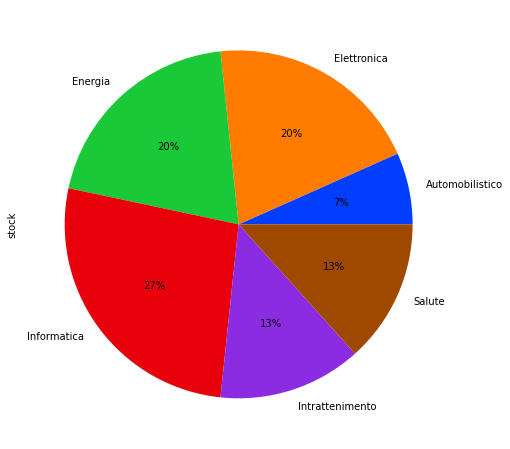

In [130]:
stocks_df.groupby('field').stock.count().plot.pie(figsize = (8, 8), 
                                                  colors = sns.color_palette('bright')[0:7], 
                                                  autopct='%.0f%%')

In [49]:
all_stock_df = pd.DataFrame()
all_stock_df.shape[0] == 0

True

In [131]:
start_date = '2011-11-30'
end_date = '2021-11-30'

df_list = []



for t in stocks_df.ticker.unique():
    df = web.get_data_yahoo(t, start_date, end_date)
    df['ticker'] = t
    df_list.append(df)



all_stock_df = pd.concat(df_list)       
        

In [132]:
all_stock_df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2017-06-20,40.435001,39.230000,39.757500,39.272499,109544400.0,38.844769,NVDA
2020-01-15,1441.395020,1430.209961,1430.209961,1439.199951,1282700.0,1439.199951,GOOG
2013-06-18,282.910004,278.109985,279.079987,281.760010,2146100.0,281.760010,AMZN
2016-04-12,9.012500,8.785000,9.000000,8.960000,29276400.0,8.789651,NVDA
2014-01-29,3.910000,3.862500,3.887500,3.865000,16294400.0,3.651037,NVDA
2016-03-09,560.349976,550.130005,559.559998,559.469971,4377300.0,559.469971,AMZN
2021-02-02,20.209999,19.870001,20.150000,20.209999,424600.0,18.968325,E
2012-07-06,41.980000,41.410000,41.840000,41.540001,599100.0,23.868437,E
2014-02-04,3.430000,3.300000,3.350000,3.370000,22681000.0,3.370000,AMD


<AxesSubplot:xlabel='ticker'>

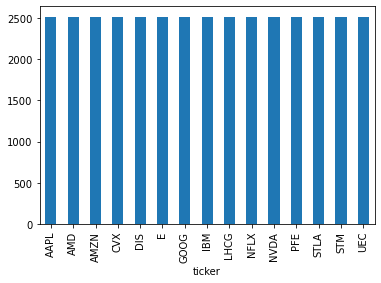

In [133]:
all_stock_df.groupby('ticker').Close.count().sort_values().plot.bar()

In [134]:
start_date = '2011-11-30'
end_date = '2021-11-30'



merged_df = pd.DataFrame()
for t in stocks_df.ticker.unique():
    if merged_df.shape[0] == 0:
        merged_df = web.get_data_yahoo(t, start_date, end_date).add_suffix('_' + str(t))
        print(t)
        print(merged_df.head())
    else:
        print(t)
        df = web.get_data_yahoo(t, start_date, end_date).add_suffix('_' + str(t))
        merged_df = merged_df.join(df)

    



merged_df.head()        

AAPL
            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL  
Date                        
2011-11-30       11.688143  
2011-12-01       11.863376  
2011-12-02       11.917506  
2011-12-05       12.018728  
2011-12-06       11.955730  
IBM
GOOG
AMZN
NVDA
AMD
NFLX
E
STLA
STM
PFE
DIS
LHCG
CVX
UEC


,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_UEC,Low_UEC,Open_UEC,Close_UEC,Volume_UEC,Adj Close_UEC
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-30,13.652857,13.510714,13.617500,13.650000,405938400.0,11.688143,180.066925,176.108994,176.453156,179.732315,...,100.500000,102.820000,13373200.0,67.437920,3.05,2.77,2.85,3.05,610900,3.05
2011-12-01,13.892857,13.598214,13.662143,13.854643,387181200.0,11.863376,181.634796,178.556412,178.785858,181.118546,...,102.820000,101.830002,7007200.0,66.788605,3.02,2.88,3.02,2.89,362700,2.89
2011-12-02,14.058214,13.877857,13.922500,13.917857,379055600.0,11.917506,182.915863,181.118546,181.567871,181.319305,...,103.040001,101.690002,6638100.0,66.696770,2.99,2.86,2.99,2.92,322000,2.92
2011-12-05,14.157500,13.942500,14.053214,14.036071,357210000.0,12.018728,185.095596,182.007645,182.772461,182.447418,...,103.580002,102.820000,6121800.0,67.437920,3.06,2.88,2.95,3.04,353500,3.04
2011-12-06,14.093929,13.906429,14.018214,13.962500,283598000.0,11.955730,185.019119,181.950287,182.265778,184.455063,...,103.099998,104.360001,7445000.0,68.447968,3.08,2.93,2.93,3.06,343600,3.06


In [135]:
merged_df.head()

,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_UEC,Low_UEC,Open_UEC,Close_UEC,Volume_UEC,Adj Close_UEC
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-30,13.652857,13.510714,13.617500,13.650000,405938400.0,11.688143,180.066925,176.108994,176.453156,179.732315,...,100.500000,102.820000,13373200.0,67.437920,3.05,2.77,2.85,3.05,610900,3.05
2011-12-01,13.892857,13.598214,13.662143,13.854643,387181200.0,11.863376,181.634796,178.556412,178.785858,181.118546,...,102.820000,101.830002,7007200.0,66.788605,3.02,2.88,3.02,2.89,362700,2.89
2011-12-02,14.058214,13.877857,13.922500,13.917857,379055600.0,11.917506,182.915863,181.118546,181.567871,181.319305,...,103.040001,101.690002,6638100.0,66.696770,2.99,2.86,2.99,2.92,322000,2.92
2011-12-05,14.157500,13.942500,14.053214,14.036071,357210000.0,12.018728,185.095596,182.007645,182.772461,182.447418,...,103.580002,102.820000,6121800.0,67.437920,3.06,2.88,2.95,3.04,353500,3.04
2011-12-06,14.093929,13.906429,14.018214,13.962500,283598000.0,11.955730,185.019119,181.950287,182.265778,184.455063,...,103.099998,104.360001,7445000.0,68.447968,3.08,2.93,2.93,3.06,343600,3.06


<AxesSubplot:xlabel='Date'>

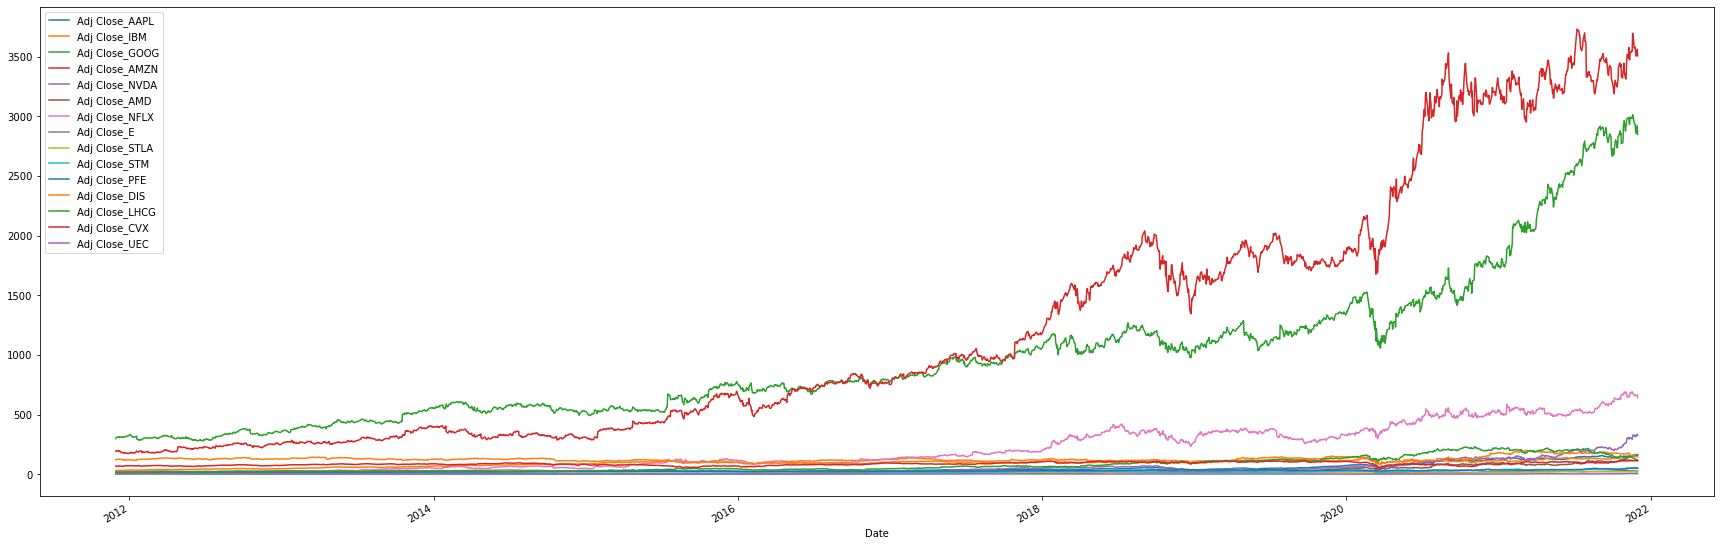

In [136]:

adj_close_columns = [col for col in merged_df.columns if "Adj Close" in col]
merged_df[adj_close_columns].plot(figsize=(30, 10))


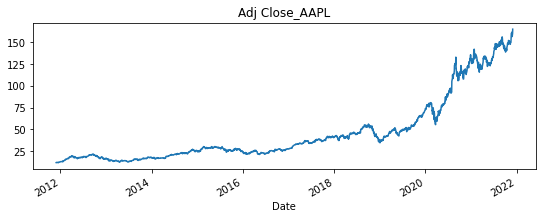

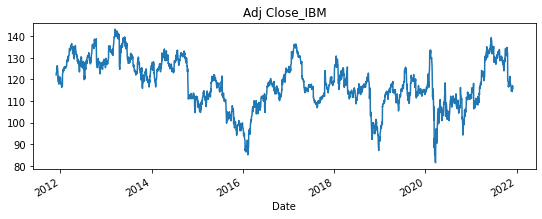

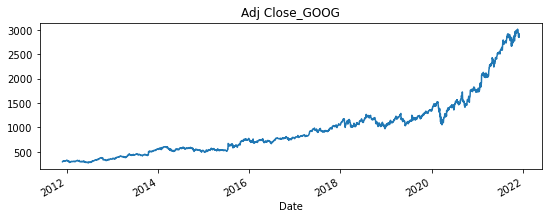

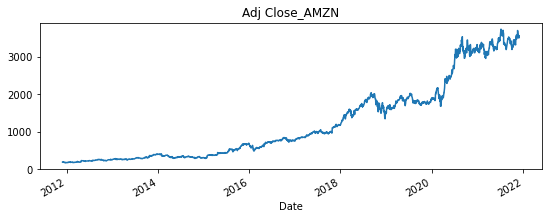

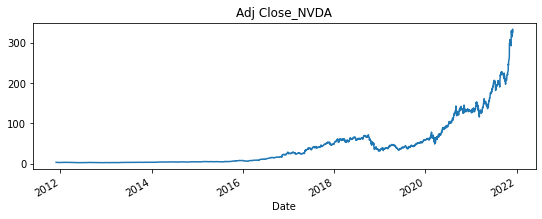

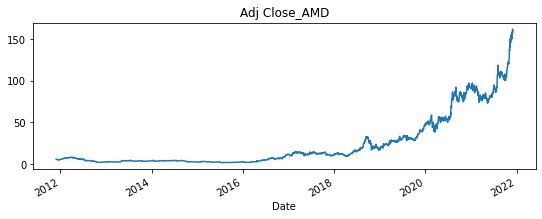

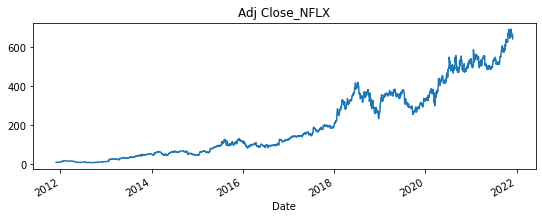

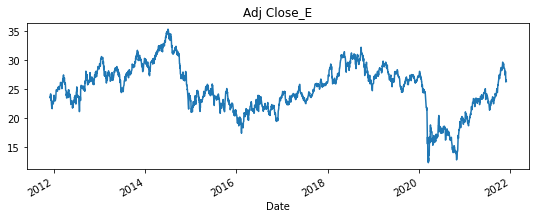

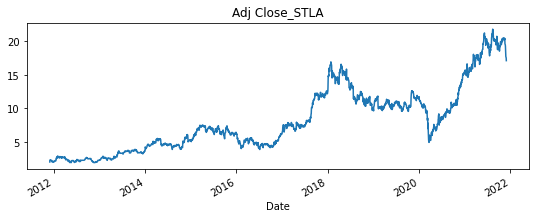

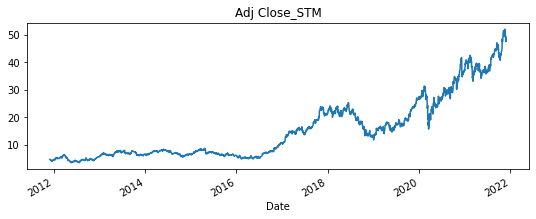

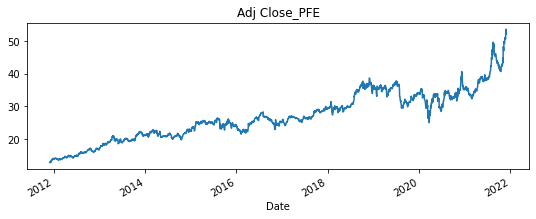

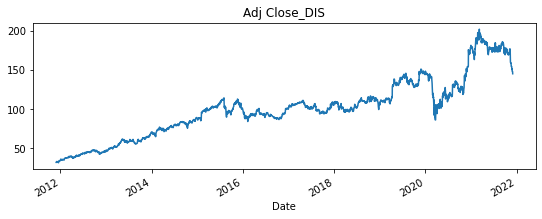

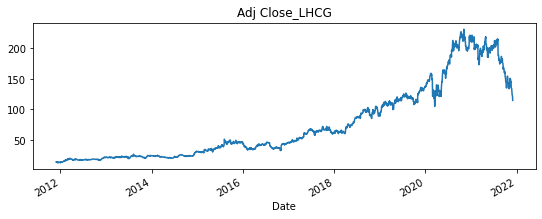

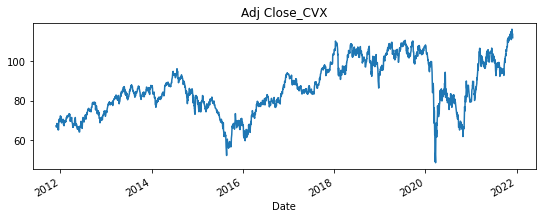

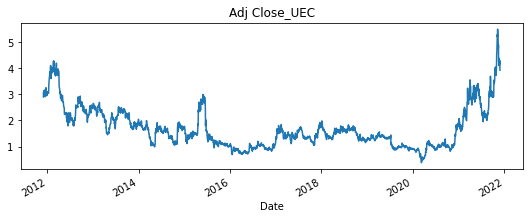

In [137]:
for col in adj_close_columns:
    merged_df[col].plot(figsize=(9, 3))
    plt.title(col)
    plt.show()


<AxesSubplot:xlabel='ticker'>

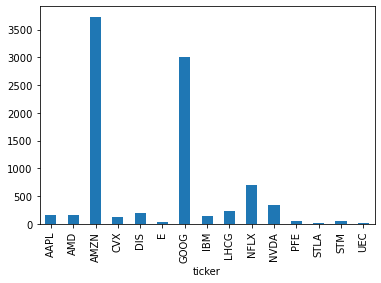

In [138]:
all_stock_df.groupby('ticker')['Adj Close'].max().plot.bar()

In [115]:
merged_df.head()

,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_REY.MI,Low_REY.MI,Open_REY.MI,Close_REY.MI,Volume_REY.MI,Adj Close_REY.MI
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-30,13.652857,13.510714,13.617500,13.650000,405938400.0,11.688141,180.066925,176.108994,176.453156,179.732315,...,100.500000,102.820000,13373200.0,67.437927,3.9675,3.8400,3.8650,3.9675,41920.0,3.561678
2011-12-01,13.892857,13.598214,13.662143,13.854643,387181200.0,11.863375,181.634796,178.556412,178.785858,181.118546,...,102.820000,101.830002,7007200.0,66.788605,4.0125,3.9000,3.9575,3.9950,36468.0,3.586365
2011-12-02,14.058214,13.877857,13.922500,13.917857,379055600.0,11.917500,182.915863,181.118546,181.567871,181.319305,...,103.040001,101.690002,6638100.0,66.696785,4.0400,3.9525,4.0125,4.0075,14692.0,3.597587
2011-12-05,14.157500,13.942500,14.053214,14.036071,357210000.0,12.018726,185.095596,182.007645,182.772461,182.447418,...,103.580002,102.820000,6121800.0,67.437927,4.0750,3.9775,4.0125,4.0525,36652.0,3.637984
2011-12-06,14.093929,13.906429,14.018214,13.962500,283598000.0,11.955726,185.019119,181.950287,182.265778,184.455063,...,103.099998,104.360001,7445000.0,68.447998,4.0625,3.9900,4.0550,4.0375,24400.0,3.624519


In [139]:
merged_yield = pd.DataFrame()

for t in stocks_df.ticker.unique():
    
    col = f"Adj Close_{t}"
    print(col)

    merged_yield[t] = np.log( merged_df[col] / merged_df[col].shift(1) ).dropna()



Adj Close_AAPL
Adj Close_IBM
Adj Close_GOOG
Adj Close_AMZN
Adj Close_NVDA
Adj Close_AMD
Adj Close_NFLX
Adj Close_E
Adj Close_STLA
Adj Close_STM
Adj Close_PFE
Adj Close_DIS
Adj Close_LHCG
Adj Close_CVX
Adj Close_UEC


In [140]:
merged_yield.head()

,AAPL,IBM,GOOG,AMZN,NVDA,AMD,NFLX,E,STLA,STM,PFE,DIS,LHCG,CVX,UEC
Date,,,,,,,,,,,,,,,
2011-12-01,0.014881,0.007683,0.023708,0.024859,0.012083,0.001756,0.040096,0.000000,0.129077,0.001578,-0.001995,0.003898,0.002156,-0.009675,-0.053885
2011-12-02,0.004552,0.001108,0.010680,-0.005596,-0.006341,-0.008811,-0.011981,-0.000235,0.001951,-0.003160,-0.007014,0.017081,0.024115,-0.001376,0.010327
2011-12-05,0.008458,0.006202,0.008491,0.001071,-0.015385,0.019282,0.054963,0.018443,0.023122,-0.009539,-0.002517,0.008974,-0.014826,0.011051,0.040274
2011-12-06,-0.005255,0.010944,-0.003009,-0.021895,-0.014314,-0.017514,-0.028644,0.006686,0.000000,-0.001598,0.019466,-0.002982,-0.030327,0.014866,0.006557
2011-12-07,-0.004769,0.005737,-0.000609,0.017196,-0.005915,0.010545,0.054546,0.001148,-0.021175,-0.011263,0.011794,0.007304,0.033877,0.001532,0.025808


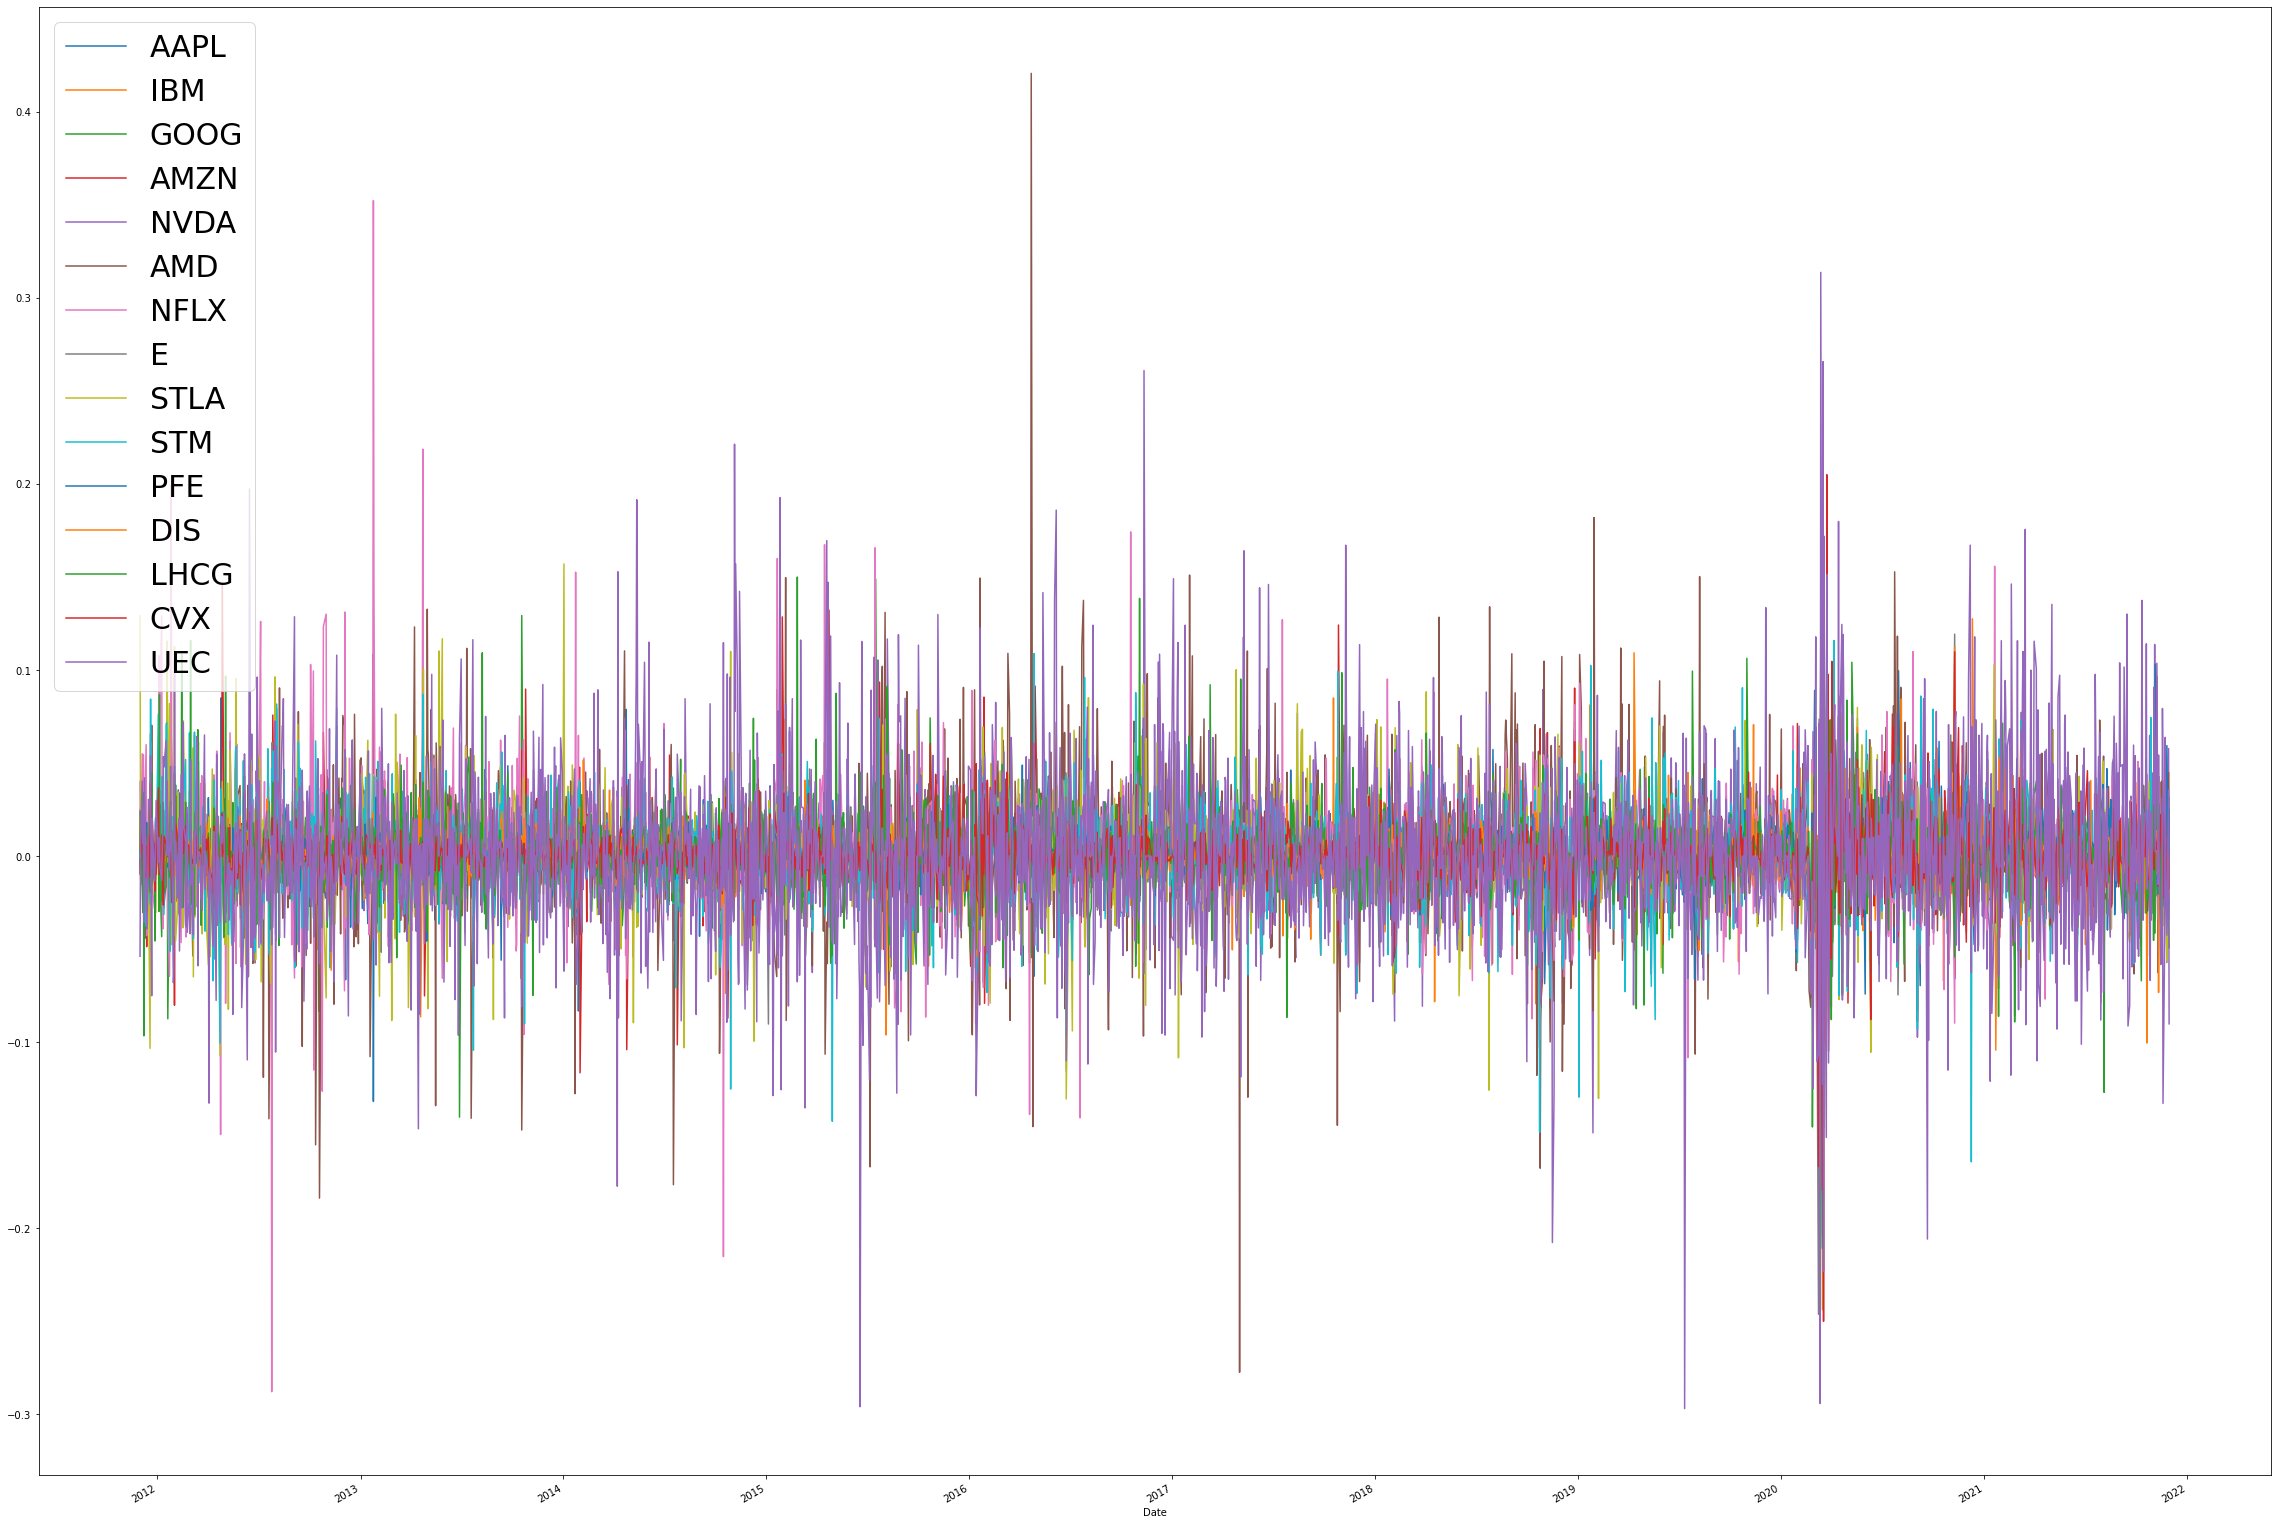

In [150]:
merged_yield.plot(figsize=(40, 30))
plt.legend(loc=2, prop={'size': 30})

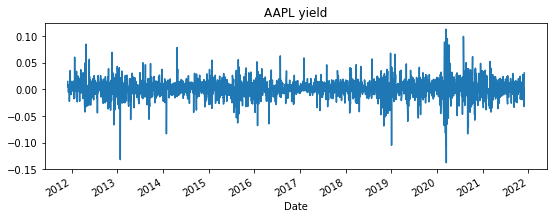

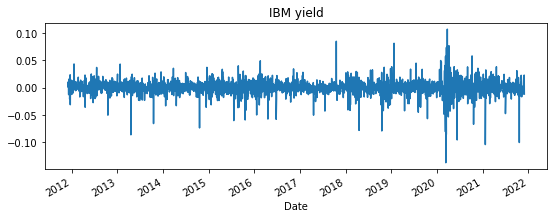

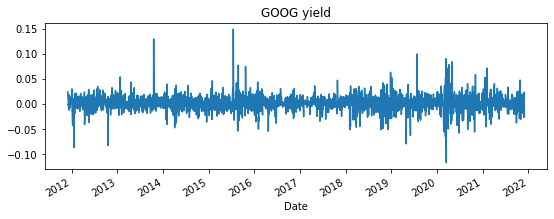

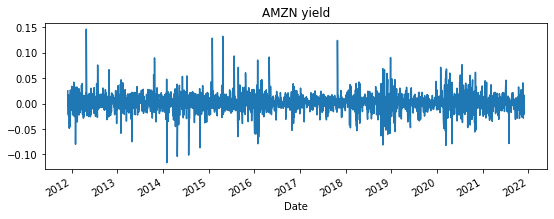

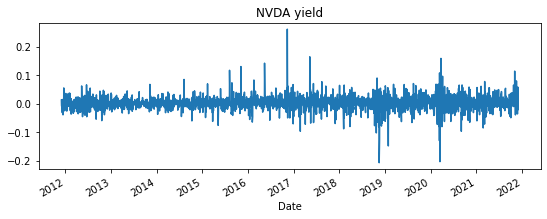

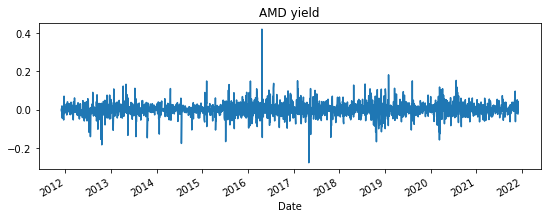

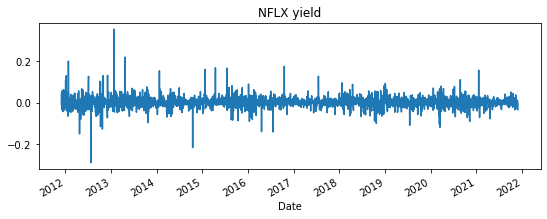

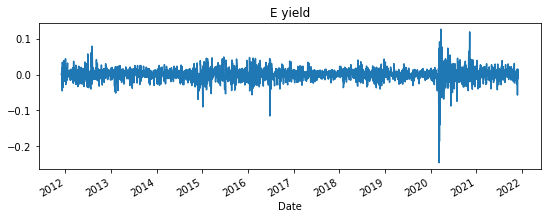

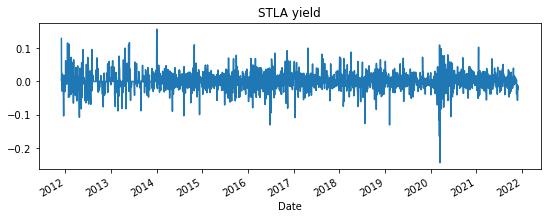

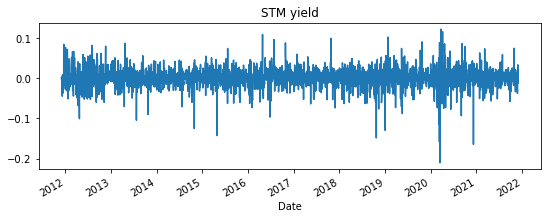

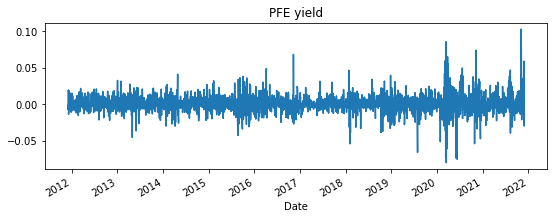

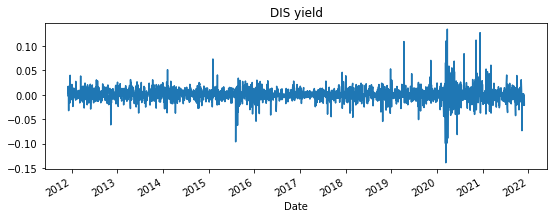

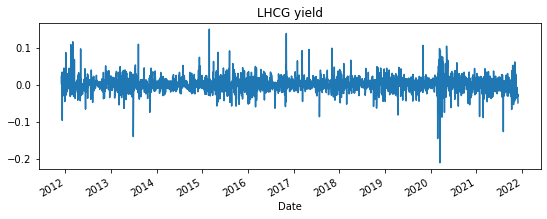

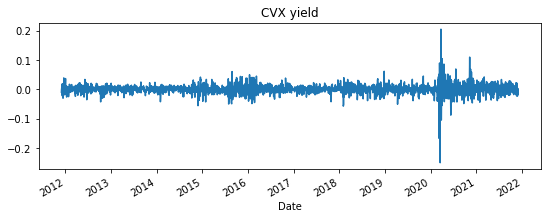

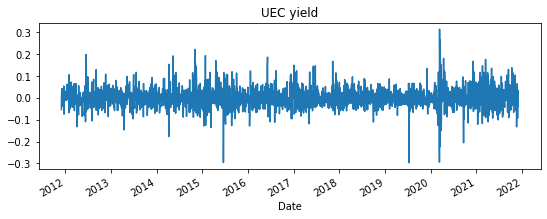

In [154]:
for col in merged_yield.columns:
    merged_yield[col].plot(figsize=(9, 3))
    plt.title(f"{col} yield")
    plt.show()


In [144]:
merged_df.groupby(pd.Grouper(freq='Q')).mean()

,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_UEC,Low_UEC,Open_UEC,Close_UEC,Volume_UEC,Adj Close_UEC
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,14.109156,13.914334,14.008880,14.015812,3.051123e+08,12.001380,181.001216,178.127498,179.721449,179.539806,...,103.806819,103.760455,7.878418e+06,68.054753,3.097727,2.925909,3.015909,3.031818,4.071136e+05,3.031818
2012-03-31,18.112079,17.793992,17.950541,17.988566,5.453669e+08,15.403148,187.051286,185.004935,185.880775,186.175908,...,107.540161,107.595323,7.018858e+06,70.851571,3.884677,3.714194,3.800161,3.805806,5.322403e+05,3.805806
2012-06-30,21.005403,20.527903,20.809127,20.753220,5.485899e+08,17.770451,191.691098,189.126073,190.381954,190.379678,...,102.086984,102.083333,6.971013e+06,67.771251,2.592540,2.436825,2.530476,2.507619,8.443063e+05,2.507619
2012-09-30,23.032630,22.669093,22.849887,22.876553,4.188073e+08,19.638706,189.726547,187.332696,188.434550,188.523476,...,111.232063,111.413016,5.796162e+06,74.606376,2.415873,2.274762,2.351111,2.346349,6.824111e+05,2.346349
2012-12-31,20.927817,20.386187,20.729574,20.634424,6.000876e+08,17.790182,187.954110,185.564670,186.799173,186.654229,...,109.247419,109.142742,6.181956e+06,73.683679,2.437903,2.316774,2.377581,2.376129,4.256581e+05,2.376129
2013-03-31,16.863107,16.481637,16.698542,16.649083,5.274056e+08,14.429851,194.859146,192.850382,193.696781,194.012907,...,115.886333,115.990333,5.579518e+06,78.962108,2.446000,2.343167,2.404667,2.393167,5.225283e+05,2.393167
2013-06-30,15.582623,15.222014,15.410117,15.383677,4.285868e+08,13.417196,196.165601,193.393583,194.831948,194.743966,...,120.861093,120.863125,6.434120e+06,82.918304,1.906875,1.800469,1.861094,1.843281,6.574453e+05,1.843281
2013-09-30,16.742271,16.435720,16.588404,16.580195,3.629280e+08,14.559962,183.027755,180.836818,181.944162,181.762220,...,122.913594,122.914375,5.022161e+06,85.007967,2.346719,2.223594,2.282188,2.293906,5.999000e+05,2.293906
2013-12-31,19.033917,18.737980,18.880240,18.891892,3.143794e+08,16.692474,173.466032,171.254033,172.180030,172.448764,...,120.846563,120.873750,5.909322e+06,84.300169,1.935625,1.837656,1.887969,1.882188,6.357547e+05,1.882188


In [146]:
for c in merged_df.columns:
    
    n = merged_df[c].isnull().sum()
    if n > 0:
        print(c)
        print(n)

In [155]:
pct_yield = pd.DataFrame()

for t in stocks_df.ticker.unique():
    
    col = f"Adj Close_{t}"
    print(col)

    pct_yield[t] = merged_df[col].pct_change(1).dropna()



Adj Close_AAPL
Adj Close_IBM
Adj Close_GOOG
Adj Close_AMZN
Adj Close_NVDA
Adj Close_AMD
Adj Close_NFLX
Adj Close_E
Adj Close_STLA
Adj Close_STM
Adj Close_PFE
Adj Close_DIS
Adj Close_LHCG
Adj Close_CVX
Adj Close_UEC


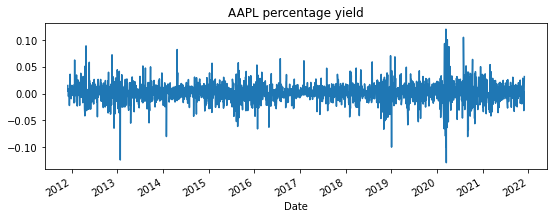

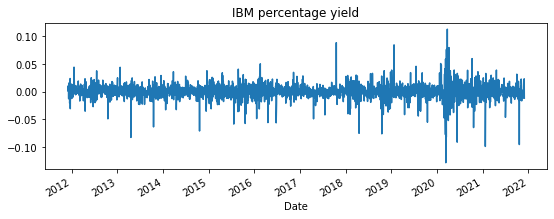

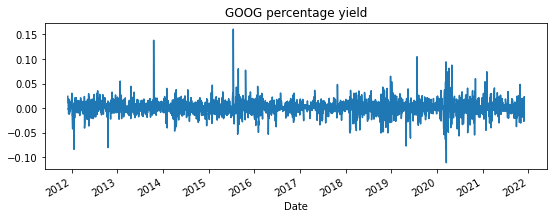

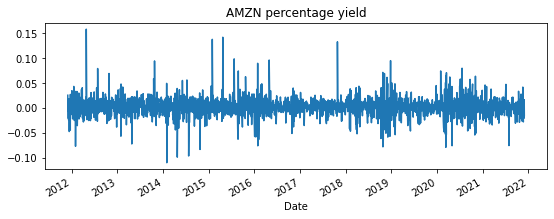

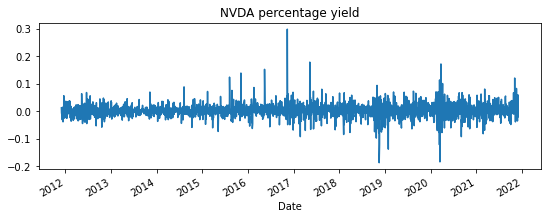

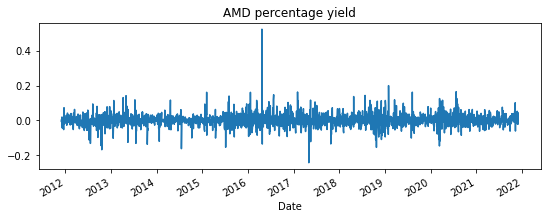

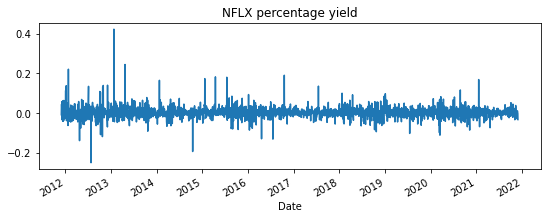

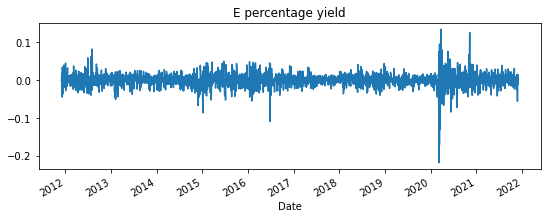

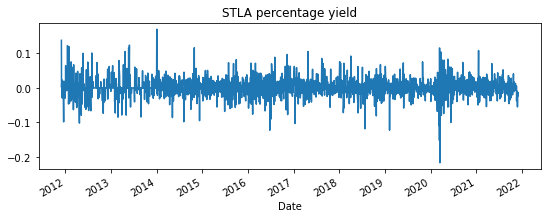

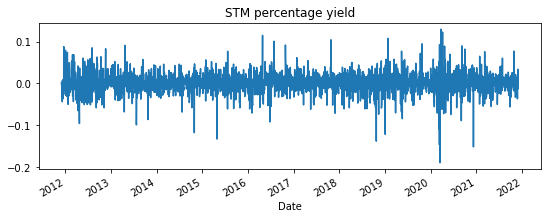

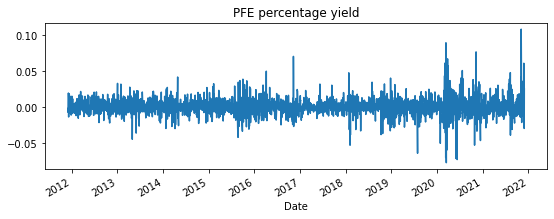

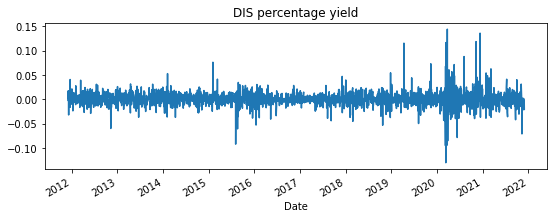

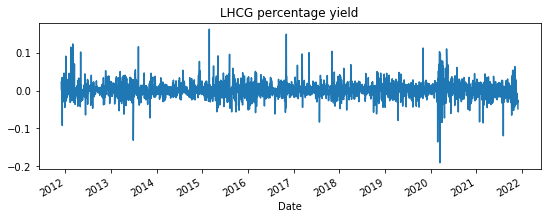

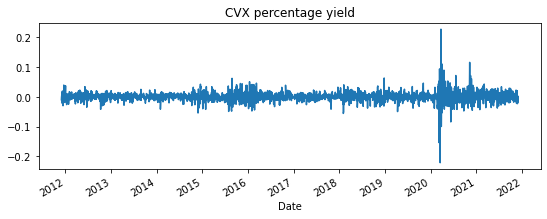

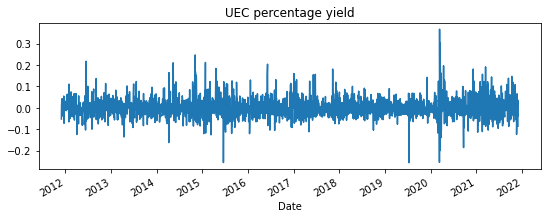

In [157]:
for col in pct_yield.columns:
    pct_yield[col].plot(figsize=(9, 3))
    plt.title(f"{col} percentage yield")
    plt.show()

In [168]:
np.cumprod(pd.DataFrame({"col" : [1, 2, 4]}) + 1)

,col
0,2
1,6
2,30


In [169]:
# ogni riga t corrisponde al ricavo al tempo t relativo all'investimento di 1 $
cumprod_perc =  np.cumprod(pct_yield+1)

cumprod_perc

,AAPL,IBM,GOOG,AMZN,NVDA,AMD,NFLX,E,STLA,STM,PFE,DIS,LHCG,CVX,UEC
Date,,,,,,,,,,,,,,,
2011-12-01,1.014992,1.007713,1.023991,1.025170,1.012156,1.001757,1.040911,1.000000,1.137778,1.001580,0.998007,1.003905,1.002158,0.990372,0.947541
2011-12-02,1.019624,1.008830,1.034986,1.019450,1.005758,0.992970,1.028514,0.999765,1.140000,0.998420,0.991032,1.021200,1.026619,0.989010,0.957377
2011-12-05,1.028284,1.015106,1.043811,1.020542,0.990403,1.012302,1.086627,1.018375,1.166667,0.988941,0.988540,1.030405,1.011511,1.000000,0.996721
2011-12-06,1.022894,1.026277,1.040675,0.998440,0.976328,0.994728,1.055943,1.025206,1.166667,0.987362,1.007972,1.027336,0.981295,1.014977,1.003279
2011-12-07,1.018027,1.032181,1.040041,1.015758,0.970569,1.005272,1.115140,1.026384,1.142222,0.976303,1.019930,1.034868,1.015108,1.016534,1.029508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,13.792150,0.945221,9.830466,18.617922,88.425115,26.347978,70.950261,1.190574,9.522775,10.672652,3.930346,4.784281,9.370504,1.706631,1.432787
2021-11-24,13.837438,0.944735,9.827821,18.619845,91.009961,27.732865,71.409115,1.179139,9.295100,10.572008,3.915726,4.794101,9.196403,1.719691,1.416394
2021-11-26,13.399090,0.937289,9.565810,18.225390,87.748272,27.207381,72.206423,1.113490,8.785305,10.182276,4.155025,4.691783,8.894964,1.680364,1.357377


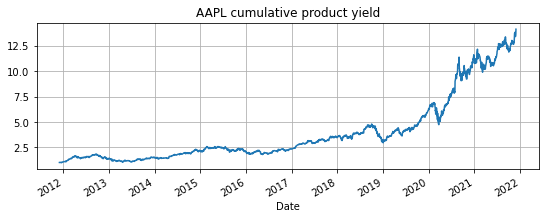

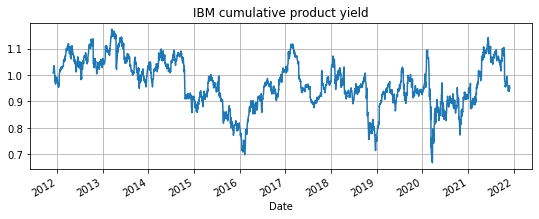

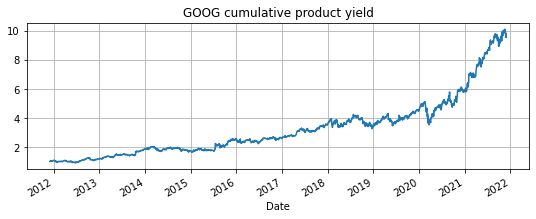

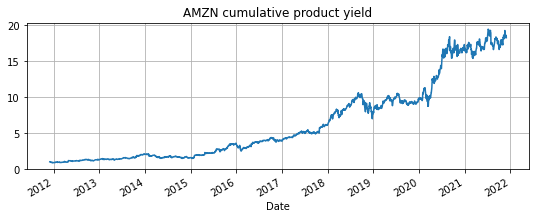

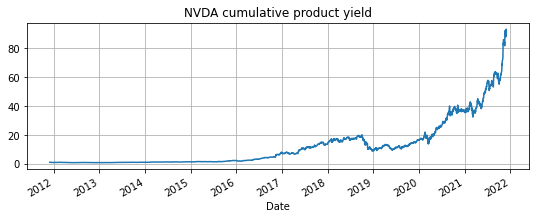

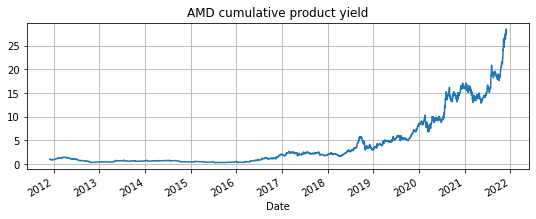

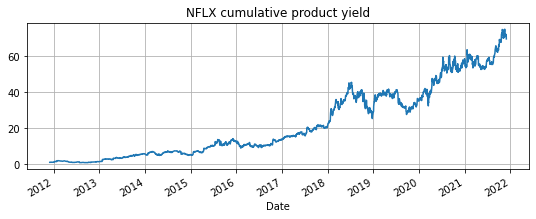

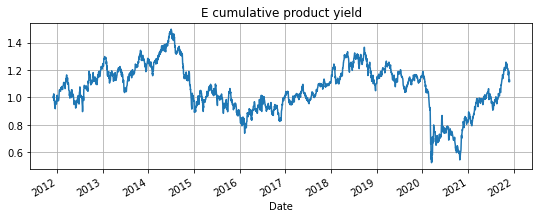

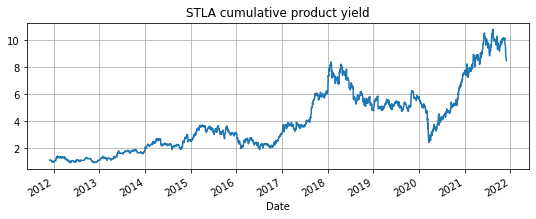

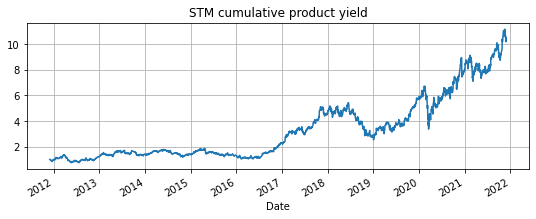

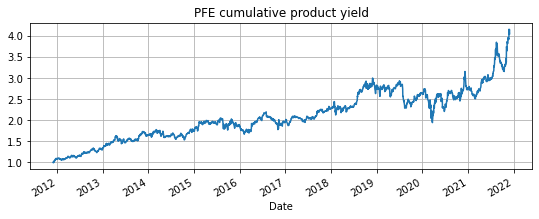

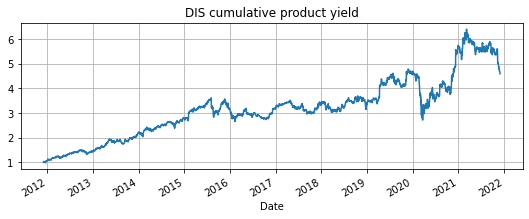

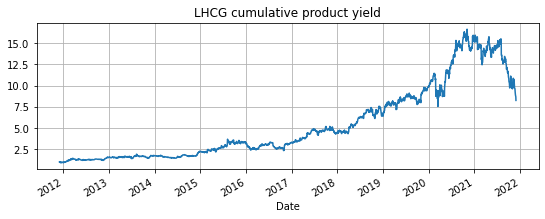

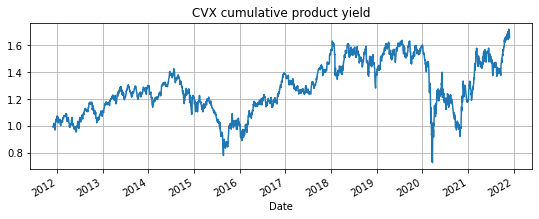

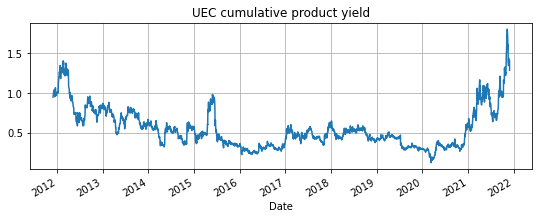

In [189]:
#cumprod_perc.plot(figsize=(18, 9), color = sns.color_palette("Set2"))
#plt.legend(loc=2, prop={'size': 20})

for col in cumprod_perc.columns:
    cumprod_perc[col].plot(figsize=(9, 3), grid=True)
    plt.title(f"{col} cumulative product yield")
    plt.show()